#  <span style="color:#084B8A; font-weight:bold">NETWORK &amp; WEB SCIENCE</span>
###  <span style="color:#084B8A; font-weight:bold">Teilleistung: Übungsbeispiel</span>
<br/>

Informationen: 
* Dokumentation: [networkx.org](https://networkx.org/documentation/stable/tutorial.html).
* Dokumentation: [pandas.org](https://pandas.pydata.org/docs/)


In [2]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import numpy as np    # für mathematische Operationen
import pandas as pd   # Einlesen eines Dataframes
import scipy

## <span style="color:#084B8A; font-weight:bold">1 Daten</span>

* Library _pandas_ (mit ``pd.read_csv()``): Einlesen von Textdateien oder csv-Dateien. Automatisch werden sie zu einem Pandas-Dataframe konvertiert. 
* Library _pyreadr_ (mit ``read_r()``): Einlesen von R-Daten. Das Objekt ist aber nicht direkt zu verwenden, sondern sie muss noch in ein Dataframe umgewandelt werden (``NAMEdesOBJEKTES['data']``).

<div class="alert alert-block alert-info">
    <p><b>Aufgabe 1: Einlesen der Daten & Überblick</b></p>
    <ol>
        <li>Lesen Sie die Dateien <i>facebook_combined.txt</i> mit der Funktion <code>pandas::read_csv()</code> ein. Geben Sie dabei den Variablen die Namen "start_node" und "end_note". Die einzelnen Spalten sind mit einem Leerzeichen getrennt.</li>
        <li>Geben Sie den Typ des Objektes (<code>type()</code>), die ersten 10 Zeilen aus (<code>.head(n)</code>) und die Dimension (<code>.shape</code>) aus.</li>
    </ol>
</div>

In [3]:
# Aufgabe 1: Einlesen einer txt- oder csv-Datei

data = pd.read_csv("data/facebook_combined.txt", sep=' ', names=["start_node", "end_node"])

In [10]:
# Aufgabe 1: Typ, ersten 10 Zeilen, Dimension

#Typ:
print(type(data))

#Dimension:
print(data.shape)

#Ersten 10 Zeilen
data.head(10)

<class 'pandas.core.frame.DataFrame'>
(88234, 2)


,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
5,0,6
6,0,7
7,0,8
8,0,9
9,0,10


##  <span style="color:#084B8A; font-weight:bold">2 Erzeugen des Graphen</span>

Das Dataframe ist bereits eine gute Liste für die Erstellung eines ungerichteten Graphen, und zwar findet man im Dataframe alle aktuellen Kanten. 

Für die Aufgabenstellung sollen Teilgraphen untersucht werden. Dazu werden aus dem Datensatz 5000 Zeilen mit der Methode `.sample(n, random_state)` extrahiert. Der Parameter `n` gibt die Anzahl der Zeilen an, mit dem Parameter `random_state` werden dieselben Zeilen bei einer Wiederholung ausgewählt (ist für die gemeinsame Arbeit bzw. für die Nachvollziehbarkeit notwendig).

Bedingungen für `random_state`
* Nehmen Sie von allen Mitgliedern Ihrer Gruppe die letzte Ziffer der Matrikelnummer.
* Kombinieren Sie die letzten Ziffern nach der alphabetischen Reihenfolge Ihrer Vornamen.
* Geben Sie diese Nummer an.

In [11]:
# Auswahl der Zeilen pro Gruppe
number = 8271
subdata = data.sample(n=5000, random_state=number)

## <span style="color:#084B8A; font-weight:bold">3 Netzwerkanalyse</span>
<div class="alert alert-block alert-warning">
    <p><b>TEILLEISTUNG: Aufgabenstellung</b></p>
    <ol>
    <li>Erstellen Sie einen ungerichteten Graphen und geben Sie die wesentlichen Informationen zum Graphen aus.</li>
    <li>
        <p> Führen Sie eine <b>Netzwerkanalyse</b> durch. Sie können alle Analysemethoden der letzten Einheiten verwenden, wichtig ist, dass Sie die Ergebnisse interpretieren und analysieren.</p>
       <p>Folgende Fragen können eine Hilfe sein, aber es ist natürlich nicht ausreichend, nur diese zu beantworten:</p>
            <ul>
                <li>Gibt es Zusammenhangskomponenten und wenn ja, wie viele? Welche Personen sind in diesen Zusammenhangskomponenten?</li>
                <li>Wie dicht ist das Netzwerk?</li>
                <li>Gibt es Personen, die mit sehr vielen anderen verbunden sind?</li>
                <li>Gibt es isolierte Personen? Gibt es (lokale) Brücken?</li>
                <li>Wenn man Personen entfernt, was passiert mit dem Netzwerk und dem Zusammenhang?</li>
                <li>Was passsiert, wenn man eine oder mehrere Zusammenhangskomponenten entfernt?</li>
                <li>Gibt es Gruppierungen? Wie unterscheiden sich diese?</li>
                <li>Wie können Sie ein so großes Netzwerk visualisieren, so dass noch etwas erkennbar ist?</li>
            </ul>
    </li>
    <li>Geben Sie zum Schluss noch eine Zusammenfassung Ihrer Ergebnisse und eine übergreifende Interpretation. Achten Sie darauf, dass diese ausführlich und schlüssig, denn diese wird die Basis der Beurteilung sein.</li>
    </ol>  
</div>

In [61]:
#Graph definieren
G = nx.from_pandas_edgelist(subdata, "start_node", "end_node")

In [60]:
#Knotenanzahl
nx.number_of_nodes(G)

2831

In [62]:
#Kantenanzahl
nx.number_of_edges(G)

5000

#### Plot

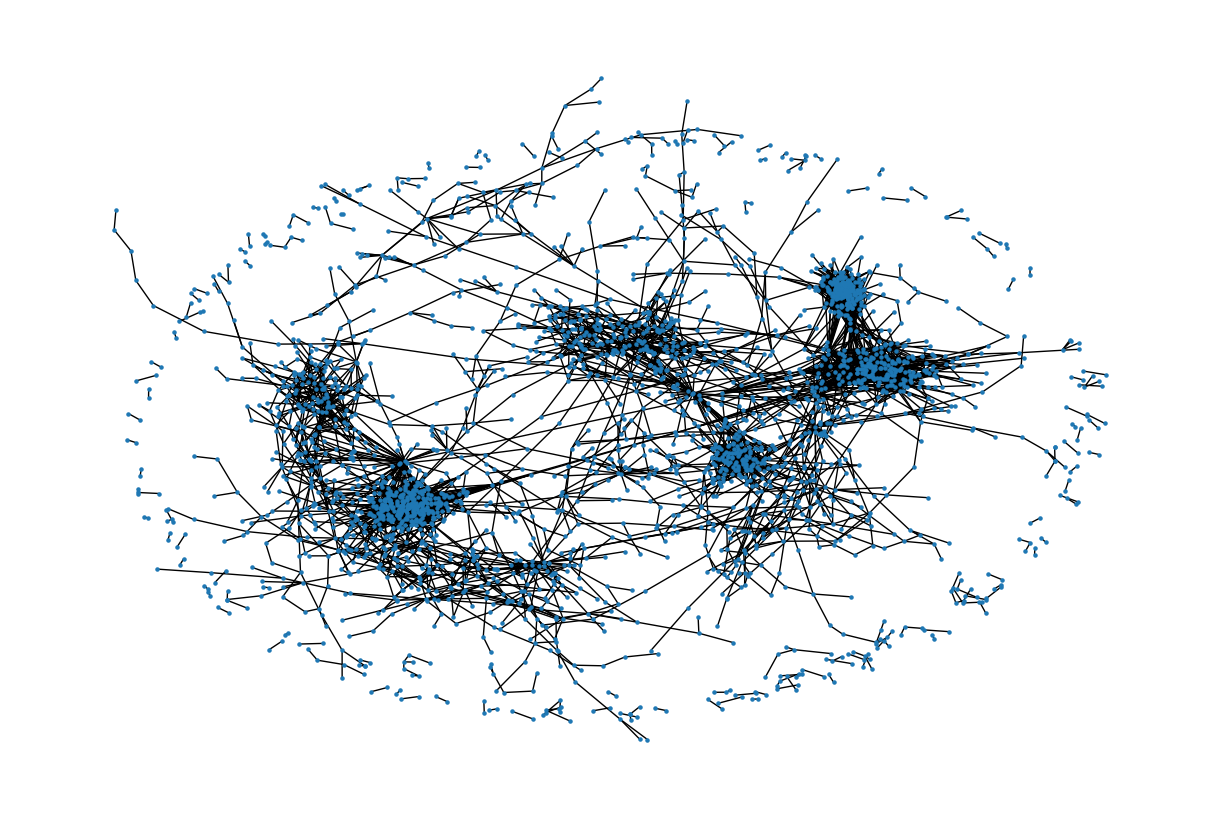

In [16]:
plt.figure(figsize=(12, 8))
nx.draw_spring(G,
               with_labels=False,
               node_size=5)
plt.show()

# Netzwerkanalyse

#### Knotenanzahl

In [14]:
G.number_of_nodes()

2831

#### Zusammenhangskomponenten

In [58]:
#Anzahl von Zusammenhangskomponenten
nx.number_connected_components(G)

158

In [65]:
#Beteiligte Personen der Komponenten
components = list(nx.connected_components(G))

#Die Komponenten mit ihren Elementen ausgeben
for i, nodes in enumerate(components, 1):
    print(f"Zusammenhangskomponente {i}:")
    print(f"Anzahl der Personen: {len(nodes)}")
    print(f"Personen: {list(nodes)}")
    print("-" * 30)

Zusammenhangskomponente 1:
Anzahl der Personen: 2046
Personen: [107, 136, 285, 348, 349, 350, 353, 354, 355, 357, 359, 360, 363, 366, 368, 370, 372, 373, 374, 376, 378, 379, 380, 387, 388, 391, 392, 394, 395, 396, 397, 398, 400, 402, 404, 405, 408, 409, 410, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 426, 427, 428, 430, 431, 432, 434, 435, 436, 437, 438, 439, 442, 444, 445, 446, 449, 451, 452, 455, 456, 457, 458, 460, 461, 462, 463, 465, 466, 470, 473, 474, 475, 477, 478, 479, 482, 483, 484, 485, 487, 488, 491, 492, 493, 494, 496, 497, 498, 499, 500, 502, 503, 504, 507, 510, 511, 512, 513, 514, 515, 517, 524, 525, 526, 527, 530, 531, 532, 534, 535, 536, 538, 539, 541, 542, 543, 544, 545, 546, 547, 553, 555, 556, 557, 558, 559, 560, 562, 563, 565, 566, 567, 568, 569, 570, 572, 579, 580, 584, 587, 588, 590, 591, 592, 596, 597, 601, 605, 606, 609, 611, 614, 616, 617, 618, 619, 620, 623, 625, 629, 630, 633, 634, 636, 637, 641, 643, 644, 645, 646, 651, 653, 654, 664, 6

#### Netzwerkdichte

In [27]:
density = nx.density(G)
print(density)

0.0012481698709267536


#### Personen mit vielen Verbindungen

In [38]:
#Sortierte Knotengrade (absteigend)
degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)

print("10 Personen mit den meisten Verbindungen:")
for person, connections in degree[:10]:
    print(f"{person}: {connections} Verbindungen")

10 Personen mit den meisten Verbindungen:
107: 57 Verbindungen
1912: 47 Verbindungen
1684: 47 Verbindungen
3437: 38 Verbindungen
0: 21 Verbindungen
1888: 20 Verbindungen
2543: 20 Verbindungen
1663: 20 Verbindungen
2047: 19 Verbindungen
2347: 18 Verbindungen


#### Isolierte Personen & lokale Brücken

In [63]:
#Gibt es Brücken?
nx.has_bridges(G)

True

In [64]:
#Gibt es isolierte Personen?
isolates = list(nx.isolates(G))
print(f"Isolierte Personen: {len(isolates)}")

Isolierte Personen: 0


In [51]:
# Alle lokalen Brücken finden
local_bridges = list(nx.local_bridges(G, with_span=True))
print(f"Anzahl lokaler Brücken: {len(local_bridges)}")

# Die ersten 5 Brücken anzeigen (Knoten A, Knoten B, Span)
print("Beispiele für lokale Brücken:")
for u, v, span in local_bridges[:5]:
    print(f"Brücke zwischen {u} und {v} -> Umweg ohne Brücke: {span}")


Isolierte Personen: 0
Anzahl lokaler Brücken: 4271
Beispiele für lokale Brücken:
Brücke zwischen 2708 und 3115 -> Umweg ohne Brücke: 4
Brücke zwischen 2708 und 2719 -> Umweg ohne Brücke: 4
Brücke zwischen 3115 und 3198 -> Umweg ohne Brücke: 4
Brücke zwischen 1986 und 2564 -> Umweg ohne Brücke: 3
Brücke zwischen 1986 und 2625 -> Umweg ohne Brücke: 3


#### Robustheit des Netzwerks bei entfernen von Elementen

In [56]:
#Ausgangszustand
print(f"Ursprüngliche Anzahl Komponenten: {nx.number_connected_components(G)}")
giant_size_orig = len(max(nx.connected_components(G), key=len))
print(f"Größe der größten Komponente: {giant_size_orig}")

#Die wichtigsten Personen identifizieren (nach Degree)
#Top 3 Hubs (Personen mit größten Knotengrad)
top_hubs = sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)[:3]
nodes_to_remove = [person for person, degree in top_hubs]

#Netzwerk kopieren und Personen entfernen
G_reduced = G.copy()
G_reduced.remove_nodes_from(nodes_to_remove)

#Ergebnis prüfen
new_components = nx.number_connected_components(G_reduced)
giant_size_new = len(max(nx.connected_components(G_reduced), key=len))

print(f"Nach Entfernen von {nodes_to_remove}:")
print(f"Neue Anzahl Komponenten: {new_components}")
print(f"Neue Größe der größten Komponente: {giant_size_new}")
print(f"Verlust an Zusammenhalt: {giant_size_orig - giant_size_new} Personen sind nicht mehr Teil des Hauptnetzwerks.")

Ursprüngliche Anzahl Komponenten: 158
Größe der größten Komponente: 2046
Nach Entfernen von [107, 1912, 1684]:
Neue Anzahl Komponenten: 203
Neue Größe der größten Komponente: 1958
Verlust an Zusammenhalt: 88 Personen sind nicht mehr Teil des Hauptnetzwerks.


### Interpretation:

Die Analyse zeigt, dass das Netzwerk eine hohe Abhängigkeit von wenigen Schlüsselpersonen aufweist. Durch das gezielte Entfernen der drei zentralsten Knoten [107, 1912, 1684] erhöhte sich die Fragmentierung des Netzwerks signifikant von 158 auf 203 Komponenten. Besonders kritisch ist, dass dadurch 85 weitere Personen (ca. 4 % der Hauptkomponente) vom Kernnetzwerk abgeschnitten wurden. Dies belegt, dass diese drei Personen eine essenzielle Brückenfunktion einnehmen. Das Netzwerk ist somit nicht robust gegenüber dem Ausfall dieser spezifischen Akteure, da sie als einzige Verbindungskanäle für periphere Gruppen fungieren.

# 2. Reduzierung des Netzwerks

## 2.1 Indentifizieren der Komponenten

In [42]:
components = list(nx.connected_components(G)) # Liste der Komponenten
large_components = [c for c in components if len(c) >= 10] # Komponenten >= 10

In [45]:
nodes_in_large_components = set().union(*large_components)

In [46]:
H = G.subgraph(nodes_in_large_components)

In [51]:
print(f"Nodes G: {len(G.nodes())}\nNodes H: {len(H.nodes())}\nNodes removed: {len(G.nodes()) - len(H.nodes())}")

Nodes G: 2831
Nodes H: 2457
Nodes removed: 374


In [54]:
print(f"Edges H: {len(H.edges())}")

Edges H: 4780


In [56]:
print(len(list(nx.connected_components(H))))

4


### DISKUSSION: Zusammenfassung & Interpretation
